# Rental property analysis in Germany

# Task 6.6: Sourcing & Analyzing Time Series Data

#### 1.Import Libraries
#### 2.Import Data
#### 3.Data Cleaning
#### 4.Data Subsetting
#### 5.Time-series analysis: decomposition
#### 6.Testing for stationarity
#### 6.1 Dicker-Fuller Test
#### 6.2 Auto-correlation Test
#### 7.Stationarizing the Rental data


# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# 2. Import Data 

In [3]:
# Create path
path = r"C:\Users\marce\Documents\Apartment rental offers in Germany"

In [4]:
# Import original data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'immodata_cleaned_2505.csv'), index_col = False)

# 3. Data Cleaning 

In [5]:
df=df[['Year_constructed', 'Total_rent']]

In [6]:
df.head()

,Year_constructed,Total_rent
0,1965,840
1,1871,919
2,2019,1300
3,1964,919
4,1950,903


In [7]:
df.shape

(206309, 2)

In [8]:
type(df)

pandas.core.frame.DataFrame

# 4. Data subsetting 

In [10]:
# Creating a new dataframe with median Total Rent rate grouped by years

data = df.groupby('Year_constructed').agg({'Total_rent': ['median']})

In [11]:
data


,Total_rent
,median
Year_constructed,
1803,493.0
1804,919.0
1805,1050.0
1806,1200.0
1807,919.0
...,...
2018,1081.0
2019,1094.0


In [12]:
data.dtypes

Total_rent  median    float64
dtype: object

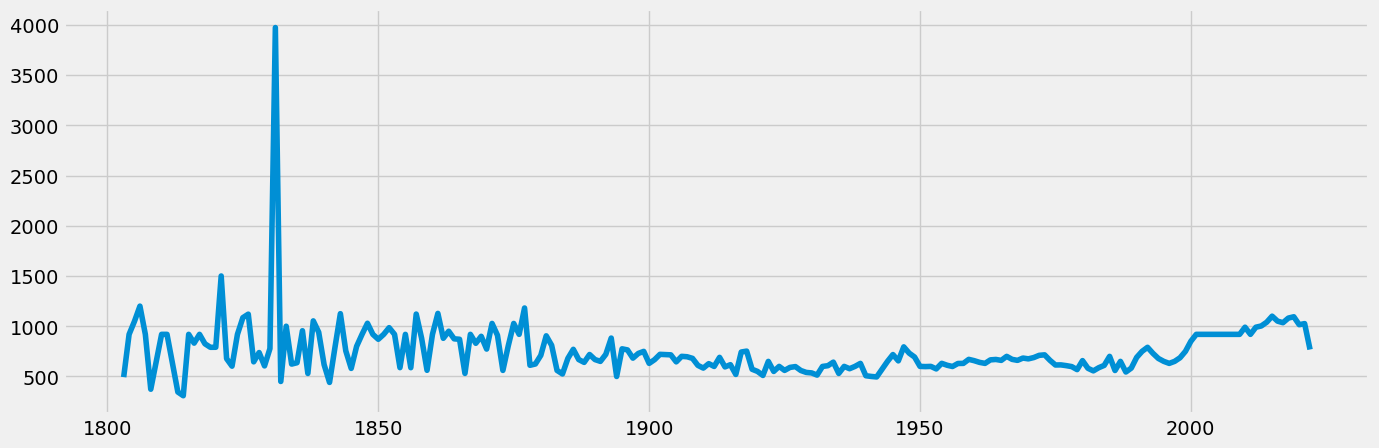

In [13]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

In [16]:
 #Check for missing values (no missing values)

data.isnull().sum() 

Total_rent  median    0
dtype: int64

In [17]:
# Check for duplicates ( keeping the duplicates values, as some years have similar rental values )

dups = data.duplicated()
dups.sum()

68

# 5.Time-series analysis: decomposition 

In [18]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=1)

In [19]:
# Defining a fixed size for all special charts

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

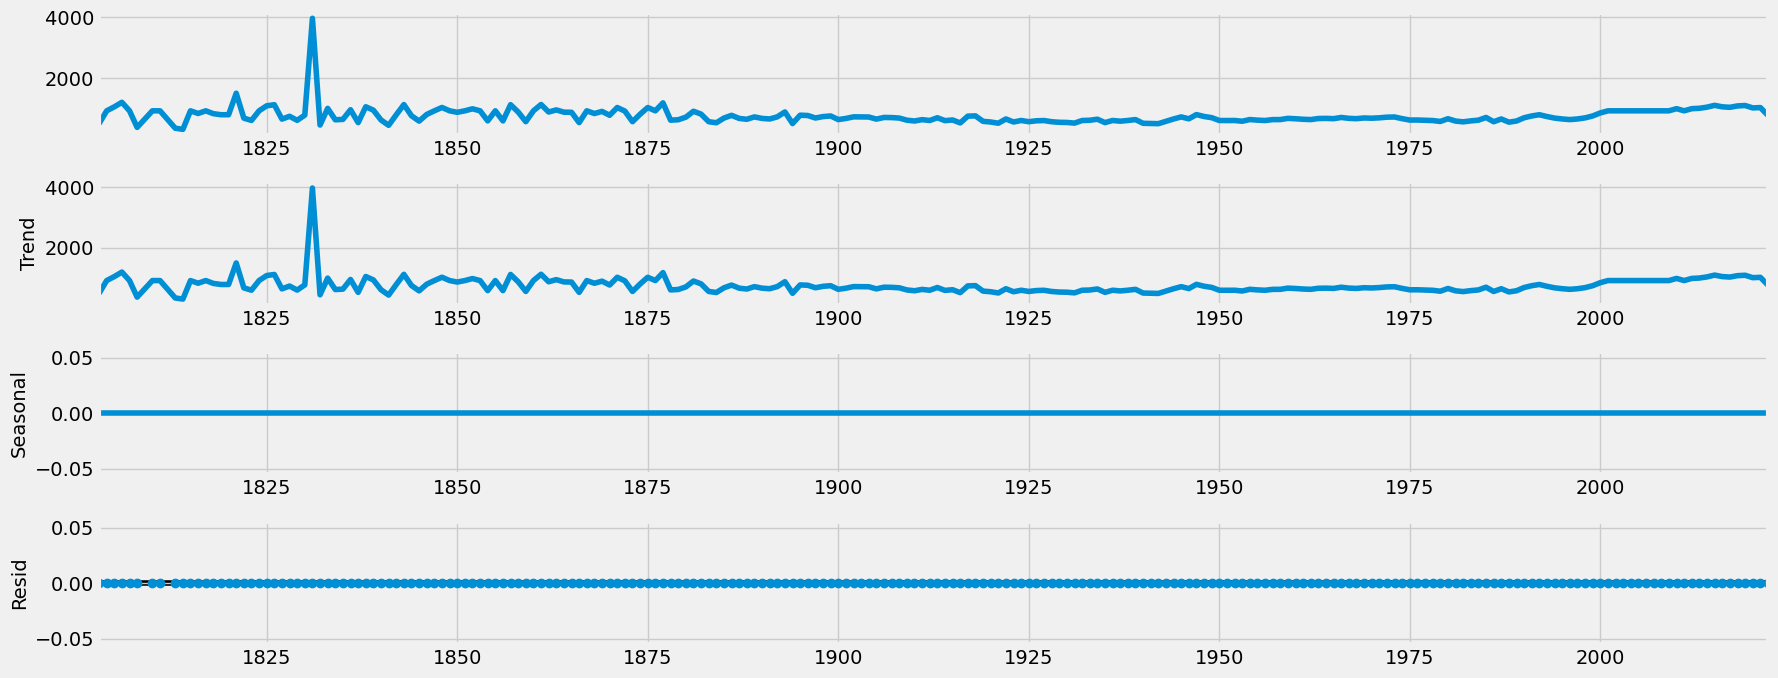

In [20]:
# Plotting decomposition of time-series data

decomposition.plot()
plt.show()

#### As the data doesn't have much noise the level and the trend appear the same. We can see minor fluctuations over the years with excepion of the years before 1850, where a lot of fluctuations can be observed.

# 6. Testing for stationarity

### 6.1 Dicker-Fuller Test: 

In [22]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why we need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Total_rent'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.803429
p-value                          0.057786
Number of Lags Used              6.000000
Number of Observations Used    211.000000
Critical Value (1%)             -3.461727
Critical Value (5%)             -2.875337
Critical Value (10%)            -2.574124
dtype: float64


#### The Test Statistic of -2.803429 is larger than the critical value (5%) of -2.875337, which indicates that the null hypothesis cannot be rejected.

### 6.2 Auto-correlation Test: 

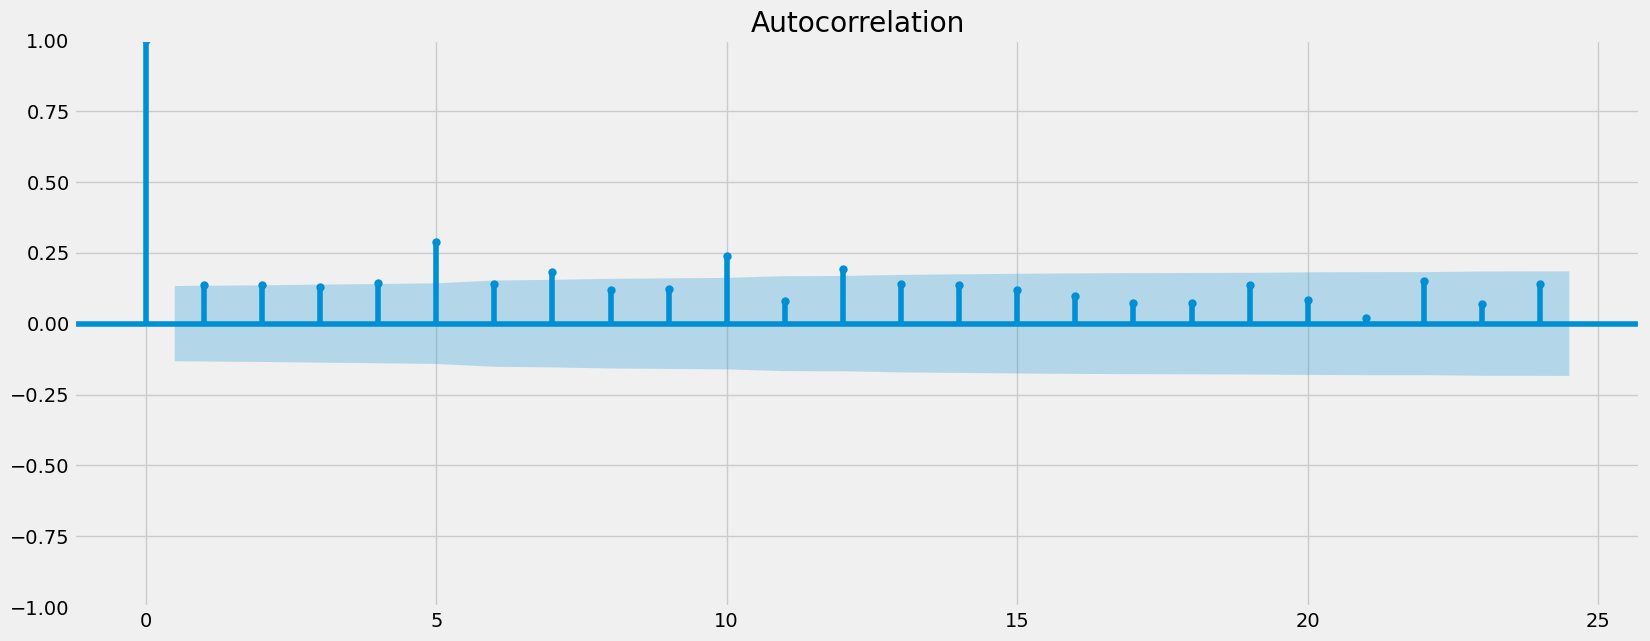

In [23]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

##### The vertical lines represent the lags in the series, while the blue area represents the confidence interval. The lines go above the blue edge of the confidence interval, this means we have lags that are significantly correlated with each other and the data is stationary.

# 7. Stationarizing the Rental data

In [24]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = data - data.shift(1)

In [25]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [26]:
# Checking values and headers

data_diff.head()

,Total_rent
,median
Year_constructed,
1804,426.0
1805,131.0
1806,150.0
1807,-281.0
1808,-546.5


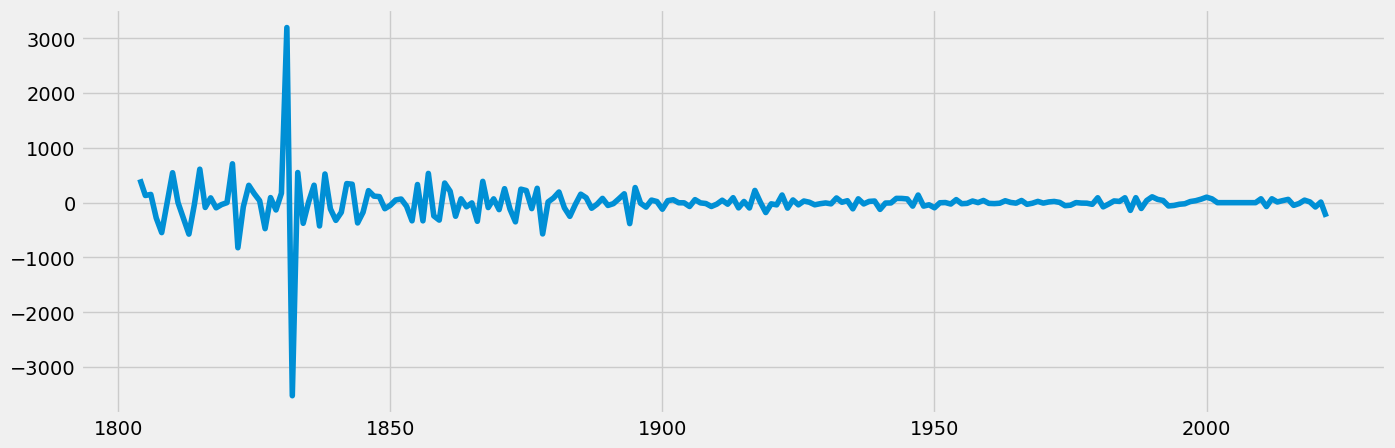

In [27]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [28]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.763249e+00
p-value                        2.639155e-14
Number of Lags Used            8.000000e+00
Number of Observations Used    2.080000e+02
Critical Value (1%)           -3.462186e+00
Critical Value (5%)           -2.875538e+00
Critical Value (10%)          -2.574231e+00
dtype: float64


### The results show that the data is  stationary. The test statistic value of -8.763249e+00 is less than the critical value (5%) of -2.875538e+00 and critical value 10% of -2.574231e+00. Therefore, the test result is significant and the null hypothesis can be rejected.


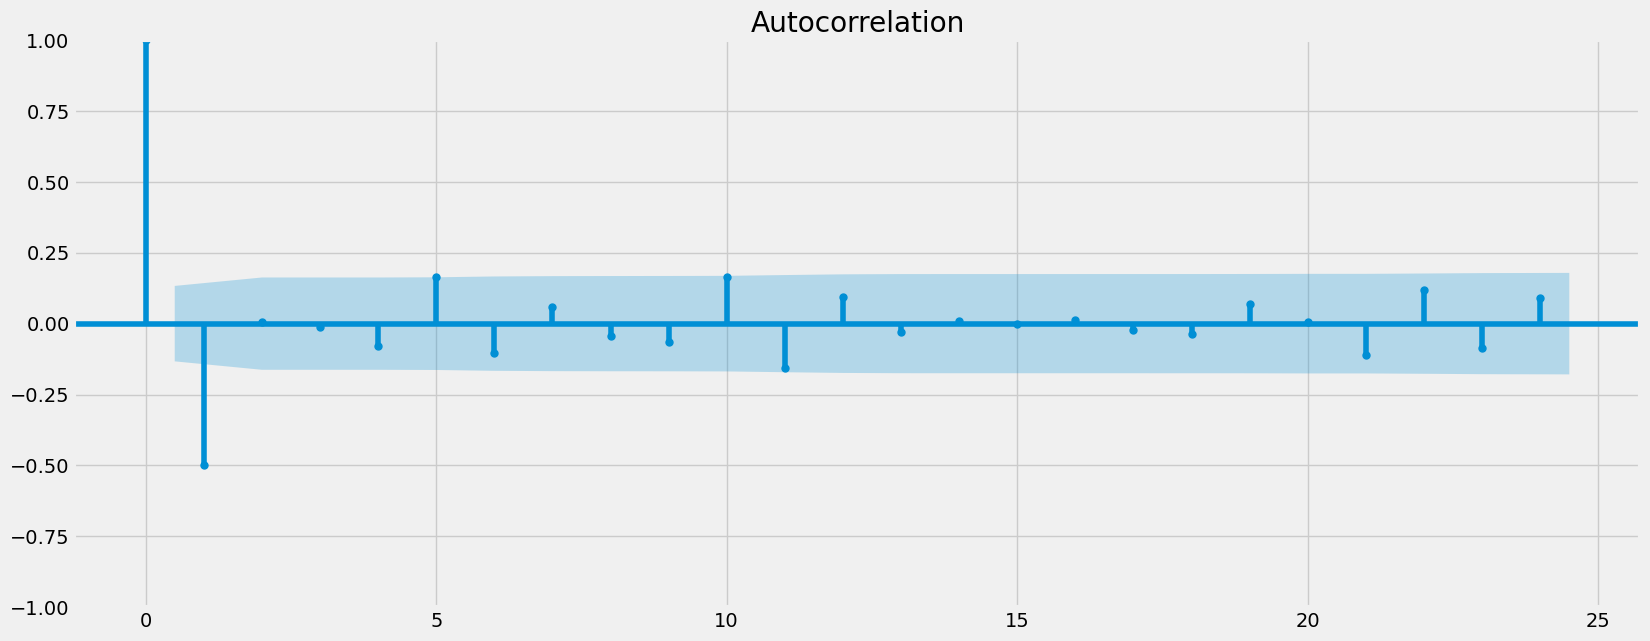

In [29]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

#### The autocorrelation plot has improved.